# Setup

In [85]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns

# 1

**Suppose the globe tossing data (Lecture 2, Chapter 2) had turned out to be 4 water and 11 land. Construct the posterior distribution.**

In [61]:
def uniform_prior(grid_points: int, prior_value: int = 0.5):
    """
    Returns Uniform prior density

            Parameters:
                prior_value (int): Prior value
                grid_points (int): Number of grid points to generate the array

            Returns:
                density (numpy.array): Uniform density of prior values of size grid_points
    """
    return np.repeat(prior_value, grid_points)


def truncated_prior(grid_points, trunc_point=0.5):
    """
    Returns Truncated prior density

            Parameters:
                grid_points (numpy.array): Array of prior values
                trunc_point (double): Value where the prior is truncated

            Returns:
                density (numpy.array): Truncated density of prior values
    """
    return (np.linspace(0, 1, grid_points) >= trunc_point).astype(int)

def double_exp_prior(grid_points):
    """
    Returns Double Exponential prior density

            Parameters:
                grid_points (numpy.array): Array of prior values

            Returns:
                density (numpy.array): Double Exponential density of prior values
    """
    return np.exp(-5 * abs(np.linspace(0, 1, grid_points) - 0.5))


def binom_post_grid_approx(prior_func, grid_points, success, tosses):
    """
    Returns the grid approximation of posterior distribution with binomial likelihood.

            Parameters:
                    prior_func (function): A function that returns the likelihood of the prior
                    grid_points (int): Number of points in the prior grid
                    successes (int): Number of successes
                    tosses (int): number of tosses

            Returns:
                    p_grid (numpy.array): Array of prior values
                    posterior (numpy.array): Likelihood (density) of prior values
    """
    # define grid
    p_grid = np.linspace(0, 1, grid_points)

    # define prior
    prior = prior_func(grid_points)

    # compute likelihood at each point in the grid
    likelihood = stats.binom.pmf(success, tosses, p_grid)

    # compute product of likelihood and prior
    unstd_posterior = likelihood * prior

    # standardize the posterior, so it sums to 1
    posterior = unstd_posterior / unstd_posterior.sum()
    return p_grid, posterior

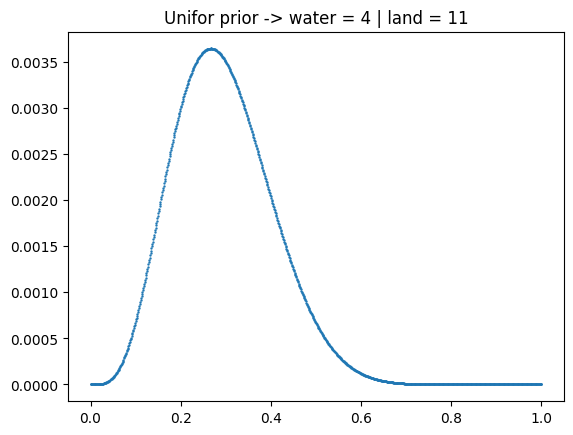

In [66]:
p_grid, posterior = binom_post_grid_approx(uniform_prior, 1000, 4, 15)
plt.scatter(p_grid, posterior, s=0.5)
plt.title(label=f"Unifor prior -> water = {4} | land = {11}");

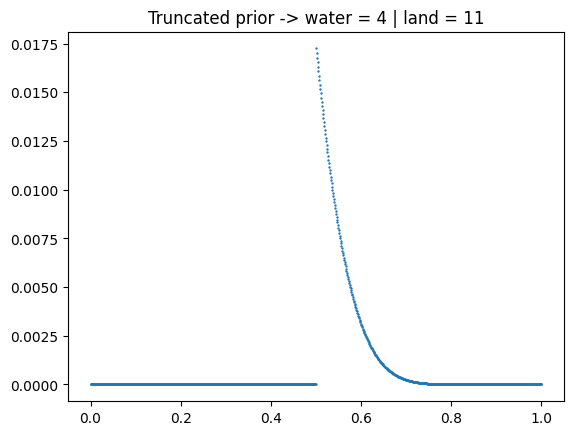

In [68]:
# This happens because it cannot assume 0.5
p_grid, posterior = binom_post_grid_approx(truncated_prior, 1000, 4, 15)
plt.scatter(p_grid, posterior, s=0.5)
plt.title(label=f"Truncated prior -> water = {4} | land = {11}");

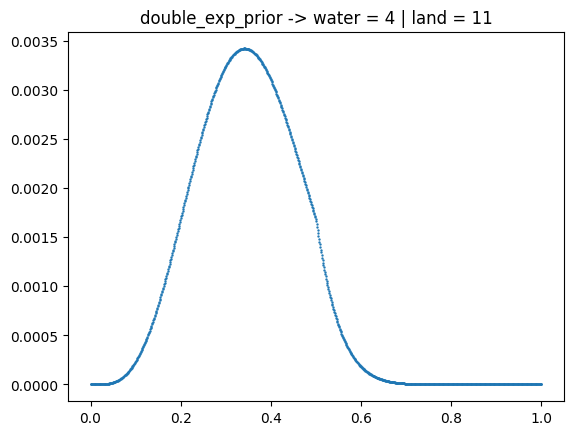

In [67]:
p_grid, posterior = binom_post_grid_approx(double_exp_prior, 1000, 4, 15)
plt.scatter(p_grid, posterior, s=0.5)
plt.title(label=f"double_exp_prior -> water = {4} | land = {11}");

Using beta distribution

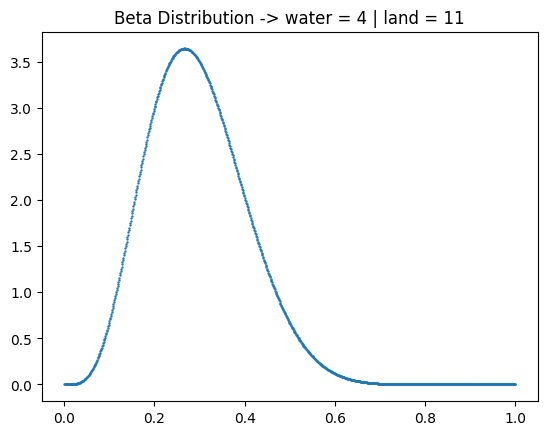

In [199]:
import numpy as np

x = np.linspace(0, 1, 1_000)
y = stats.beta.pdf(x, 4+1, 11+1)
plt.scatter(x, y, s=0.5)
plt.title(label=f"Beta Distribution -> water = {4} | land = {11}");

# 2

**Using the posterior distribution from 1, compute the posterior predictive distribution for the next 5 tosses of the same globe. I recommend you use the sampling method**

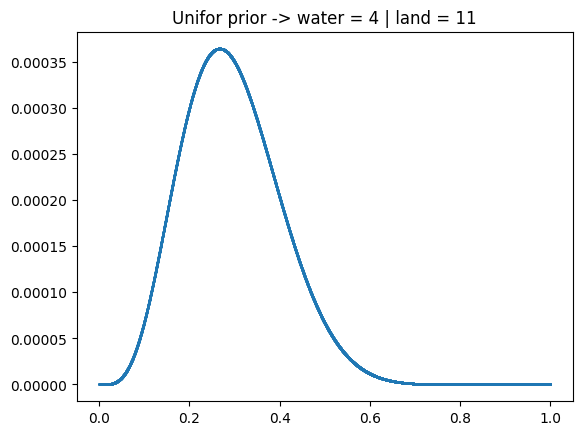

In [73]:
p_grid, posterior = binom_post_grid_approx(uniform_prior, 10_000, 4, 15)
plt.scatter(p_grid, posterior, s=0.5)
plt.title(label=f"Unifor prior -> water = {4} | land = {11}");

In [74]:
samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)

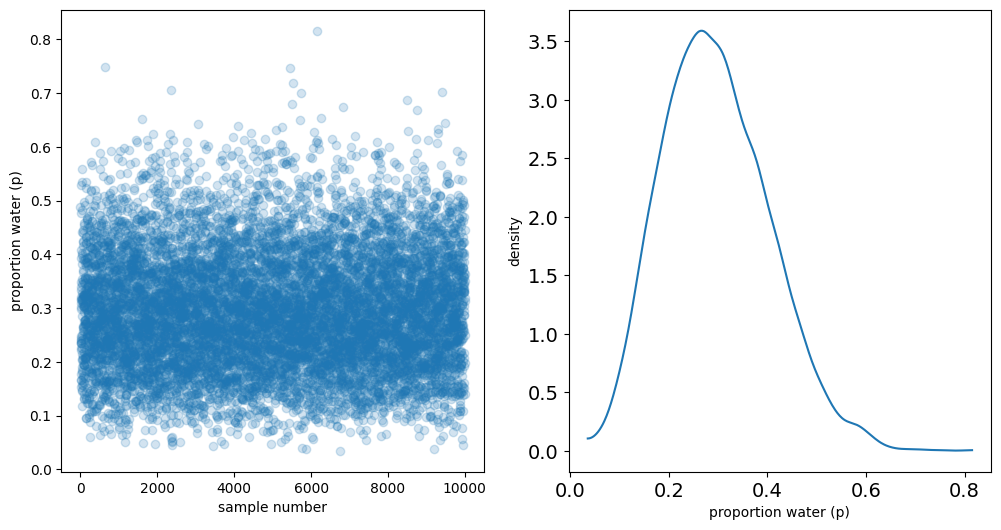

In [117]:
_, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 6))
ax0.plot(samples, "o", alpha=0.2)
ax0.set_xlabel("sample number")
ax0.set_ylabel("proportion water (p)")
az.plot_kde(samples, ax=ax1)
ax1.set_xlabel("proportion water (p)")
ax1.set_ylabel("density");

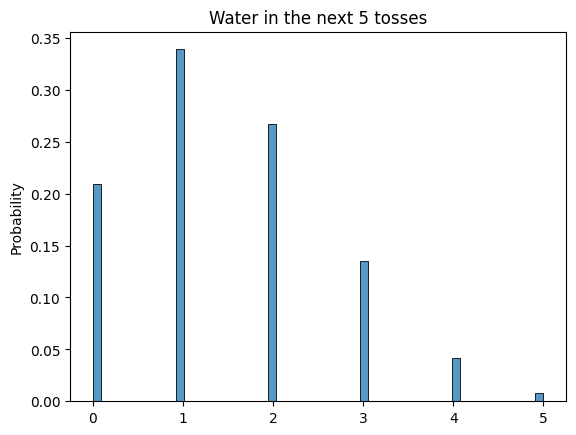

In [118]:
w = stats.binom.rvs(n=5, p=samples)
sns.histplot(w, stat='probability')
plt.title('Water in the next 5 tosses');

# 3

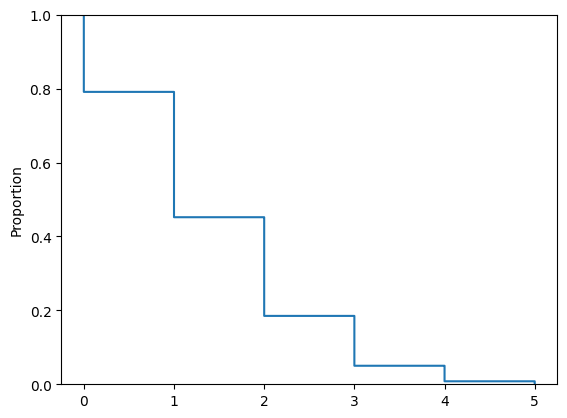

In [126]:
sns.ecdfplot(w, complementary=True);

In [125]:
sum(w>=3)/len(w)

0.185

# 4

In [205]:
def posterior_app_grid(success, p):
    # define grid for N
    n_grid = np.arange(5,20)

    # define prior for Number of tosses
    prior = uniform_prior(len(n_grid), prior_value=int(success/p))

    # compute likelihood at each point in the grid
    likelihood = stats.binom.pmf(success, n_grid, p)

    # compute product of likelihood and prior
    unstd_posterior = likelihood * prior

    # standardize the posterior, so it sums to 1
    posterior = unstd_posterior / unstd_posterior.sum()
    return n_grid, posterior

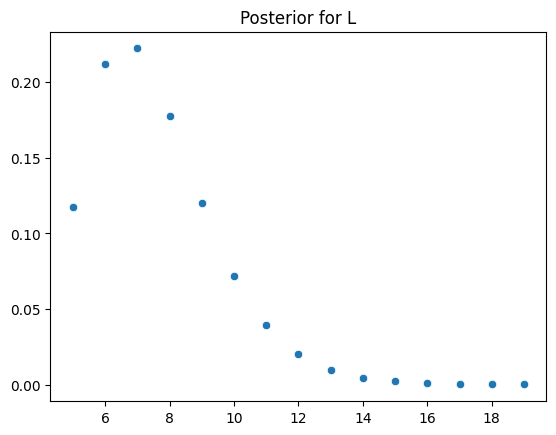

In [206]:
l_grid, posterior = posterior_app_grid(success=5, p=0.7)
sns.scatterplot(x=l_grid, y=posterior);
plt.title(label=f"Posterior for L");